# Project 1

# Used Vehicle Price Prediction
## Random Forest

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import itertools
import pickle

plt.style.use('ggplot')

In [2]:
data = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTrain_carListings.zip')

In [18]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [19]:
data.isnull().sum()

Price      0
Year       0
Mileage    0
State      0
Make       0
Model      0
dtype: int64

In [3]:
data['set']=0
data.head()

,Price,Year,Mileage,State,Make,Model,set
0,21490,2014,31909,MD,Nissan,MuranoAWD,0
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe,0
2,20925,2016,24633,SC,Hyundai,Santa,0
3,14500,2012,84026,OK,Jeep,Grand,0
4,32488,2013,22816,TN,Jeep,Wrangler,0


In [4]:
data_test = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTest_carListings.zip', index_col=0)

In [5]:
data_test['set']=1
data_test.head()

,Year,Mileage,State,Make,Model,set
ID,,,,,,
0,2015,23388,OH,Ford,EscapeFWD,1
1,2014,45061,PA,Ford,EscapeSE,1
2,2007,101033,WI,Toyota,Camry4dr,1
3,2015,13590,HI,Jeep,Wrangler,1
4,2009,118916,CO,Dodge,Charger4dr,1


In [6]:
data_full = data.append(data_test)
data_full.head()

/Users/davidfajardo/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Make,Mileage,Model,Price,State,Year,set
0,Nissan,31909,MuranoAWD,21490.0,MD,2014,0
1,Chevrolet,25741,CamaroCoupe,21250.0,KY,2016,0
2,Hyundai,24633,Santa,20925.0,SC,2016,0
3,Jeep,84026,Grand,14500.0,OK,2012,0
4,Jeep,22816,Wrangler,32488.0,TN,2013,0


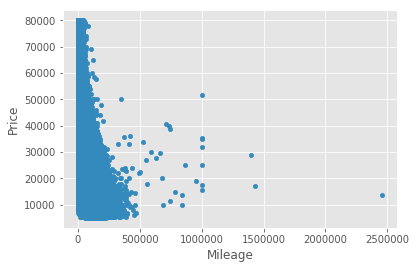

In [24]:
data_full.plot(kind='scatter', y='Price', x='Mileage')

### Imputar/Reemplazar 999's

In [7]:
data_full[data_full['Mileage']==999999]

,Make,Mileage,Model,Price,State,Year,set
22866,Chevrolet,999999,Silverado,24992.0,TX,2014,0
202266,Ford,999999,Super,15754.0,IA,2006,0
285246,Chevrolet,999999,Silverado,51468.0,IA,2015,0
347282,Chevrolet,999999,Silverado,34878.0,IA,2017,0
420789,Chevrolet,999999,Silverado,17477.0,IA,2006,0
451313,Chevrolet,999999,Silverado,35344.0,IA,2011,0
462538,Chevrolet,999999,Silverado,31866.0,IA,2014,0
109431,Chevrolet,999999,Silverado,NaN,IA,2013,1
213268,Ford,999999,F-1504WD,NaN,IA,2014,1


In [8]:
con1= data_full['Mileage']==999999
con2= data_full['Make']=='Chevrolet' 
con3= data_full['Model']=='Silverado'

con4= data_full['Make']=='Ford' 
con5= data_full['Model']=='Super'
con6= data_full['Model']=='F-1504WD'

data_full.loc[con1 & con2 & con3, 'Mileage'] = data_full.loc[con2 & con3, 'Mileage'].mean()
data_full.loc[con1 & con4 & con5, 'Mileage'] = data_full.loc[con4 & con5, 'Mileage'].mean()
data_full.loc[con1 & con4 & con6, 'Mileage'] = data_full.loc[con4 & con6, 'Mileage'].mean()

In [9]:
data_full[data_full['Mileage']==999999]

,Make,Mileage,Model,Price,State,Year,set


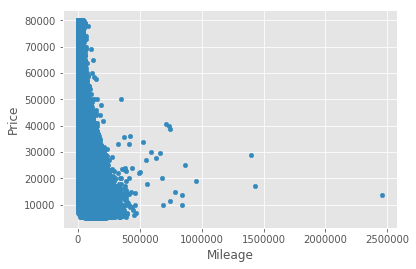

In [28]:
data_full.plot(kind='scatter', y='Price', x='Mileage')

### Dato atipico

In [10]:
data_full[data_full['Mileage']>2000000]

,Make,Mileage,Model,Price,State,Year,set
96163,Chevrolet,2457832.0,Silverado,13686.0,GA,2013,0


In [11]:
con_year= data_full['Year']==2013
data_full.loc[con2 & con3 & con_year , 'Mileage'].mean()

70374.32883018139

In [12]:
data_full.loc[data_full['Mileage']>2000000 , 'Mileage'] = data_full.loc[con2 & con3 & con_year , 'Mileage'].mean()
data_full[data_full['set']==0].loc[[96163]]

,Make,Mileage,Model,Price,State,Year,set
96163,Chevrolet,70374.32883,Silverado,13686.0,GA,2013,0


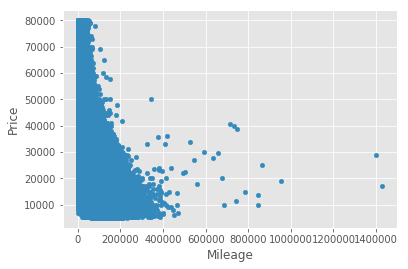

In [32]:
data_full.plot(kind='scatter', y='Price', x='Mileage')

## Codificacion binaria

In [13]:
import category_encoders as ce

encoder = ce.BinaryEncoder()

X = encoder.fit_transform(data_full)

#pickle.dump(encoder, open( 'encoder2.sav', "wb" ) )

X.head()

,Make_0,Make_1,Make_2,Make_3,Make_4,Make_5,Make_6,Model_0,Model_1,Model_2,...,State_1,State_2,State_3,State_4,State_5,State_6,Mileage,Price,Year,set
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,31909.0,21490.0,2014,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,25741.0,21250.0,2016,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,1,1,24633.0,20925.0,2016,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,84026.0,14500.0,2012,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,22816.0,32488.0,2013,0


In [14]:
data_kaggle = X[X['set']==1]
data_kaggle.drop(['Price'],axis=1,inplace=True)
df = X[X['set']==0]
#data_test.drop(['set'],axis=1,inplace=True)
print(data_kaggle.shape, df.shape)

(250000, 28) (500000, 29)


/Users/davidfajardo/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [15]:
data_kaggle.drop(['set'],axis=1,inplace=True)
df.drop(['set'],axis=1,inplace=True)
print(data_kaggle.shape, df.shape)

(250000, 27) (500000, 28)


/Users/davidfajardo/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [16]:
df.shape

(500000, 28)

In [17]:
df.Price.describe()

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

In [18]:
df.columns

Index(['Make_0', 'Make_1', 'Make_2', 'Make_3', 'Make_4', 'Make_5', 'Make_6',
       'Model_0', 'Model_1', 'Model_2', 'Model_3', 'Model_4', 'Model_5',
       'Model_6', 'Model_7', 'Model_8', 'Model_9', 'Model_10', 'State_0',
       'State_1', 'State_2', 'State_3', 'State_4', 'State_5', 'State_6',
       'Mileage', 'Price', 'Year'],
      dtype='object')

# Exercise P1.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

Submit the prediction of the testing set to Kaggle
https://www.kaggle.com/c/miia4200-20191-p1-usedcarpriceprediction

#### Evaluation:
- 25% - Performance of the model in the Kaggle Private Leaderboard
- 25% - Notebook explaining the modeling process


## Random Forest

In [19]:
y=df["Price"]
X = df.drop(['Price'], axis=1)
X.head()

,Make_0,Make_1,Make_2,Make_3,Make_4,Make_5,Make_6,Model_0,Model_1,Model_2,...,Model_10,State_0,State_1,State_2,State_3,State_4,State_5,State_6,Mileage,Year
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,31909.0,2014
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,25741.0,2016
2,0,0,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,1,24633.0,2016
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,84026.0,2012
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,22816.0,2013


In [41]:
data_kaggle.head()

,Make_0,Make_1,Make_2,Make_3,Make_4,Make_5,Make_6,Model_0,Model_1,Model_2,...,Model_10,State_0,State_1,State_2,State_3,State_4,State_5,State_6,Mileage,Year
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,23388.0,2015
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,1,1,1,0,0,45061.0,2014
2,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,101033.0,2007
3,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,1,1,13590.0,2015
4,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,118916.0,2009


In [20]:
X.shape, data_kaggle.shape, y.shape

((500000, 27), (250000, 27), (500000,))

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

## Tuning max_depth

Text(0,0.5,'mse')

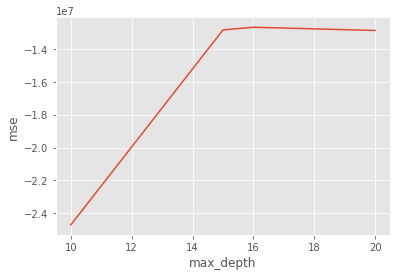

In [133]:
# list of values to try for n_estimators
#estimator_range = [10,15,20,25,30]
estimator_range = [10,15,16,20]

# list to store the average Accuracy for each value of n_estimators
rmse = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    clf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1, max_depth=estimator, max_features=13
                                , min_samples_split=7)
    rmse.append(cross_val_score(clf, X, y, cv=3, scoring='neg_mean_squared_error').mean())
    
plt.plot(estimator_range, (rmse*(1)))
plt.xlabel('max_depth')
plt.ylabel('mse')

## Tuning max_features

Text(0,0.5,'mse')

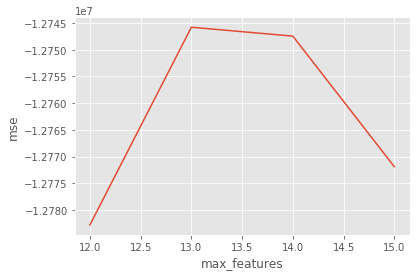

In [46]:
# list of values to try for n_estimators
#estimator_range = [15,16,17]
estimator_range = [12,13,14,15]

# list to store the average Accuracy for each value of n_estimators
mse = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    clf = RandomForestRegressor(n_estimators=10, max_depth=16, random_state=1, n_jobs=-1, max_features=estimator)
    mse.append(cross_val_score(clf, X, y, cv=3, scoring='neg_mean_squared_error').mean())
    
plt.plot(estimator_range, mse)
plt.xlabel('max_features')
plt.ylabel('mse')

In [73]:
from sklearn.ensemble import RandomForestRegressor
#clf = RandomForestRegressor(max_depth=16, n_estimators=250, max_features=13, random_state=1, n_jobs=-1) 
clf = RandomForestRegressor(max_depth=17, n_estimators=250, max_features=13, random_state=1, n_jobs=-1
                           ,min_samples_split=7,min_samples_leaf=1) 

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred

array([49465.3827381 , 14820.56578604, 31236.7341017 , ...,
       28806.07552648, 15375.38155608, 33487.82507742])

In [74]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))
#print("accuracy: ",metrics.accuracy_score(y, y_pred_train))

MAE: 2256.304726297455
MSE: 12596907.44637201
RMSE: 3549.2122289843433
R2: 0.8906993040361602


### Predecir

In [55]:
y_data_test=clf.predict(data_kaggle)
y_data_test

array([17310.09190236, 15974.59989025,  7965.24060907, ...,
       34058.23933376, 28102.7194365 , 15882.99926623])

#### Gen Submission

In [56]:
df2 = pd.DataFrame({'Price':y_data_test[:]})
print(df2.head())
print(df2.shape)
print('\n')
print(df2.describe())
df2.to_csv('RF7_binary_submission.csv', index_label='ID')
print('\n')
print(y_data_test.shape, df2.shape)

          Price
0  17310.091902
1  15974.599890
2   7965.240609
3  35292.791556
4   9346.705134
(250000, 1)


               Price
count  250000.000000
mean    21183.528044
std     10079.720686
min      5853.231979
25%     13793.918525
50%     18505.677753
75%     27482.513670
max     74589.077070


(250000,) (250000, 1)


In [38]:
#pickle.dump(clf,open('rf.sav',"wb" ) )

# Exercise P1.2 (50%)

Create an API of the model.

Example:
![](https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/img015.PNG)

#### Evaluation:
- 40% - API hosted on a cloud service
- 10% - Show screenshots of the model doing the predictions on the local machine


![Test](Pantallazo.jpeg)

In [78]:
entrada_datos = {'Make':'Ford','Mileage':23388,'Model':'EscapeFWD','Price':0,'State':'OH','Year':'2015', 'set':0} 
t = df = pd.DataFrame(entrada_datos,index=[1])
t

,Make,Mileage,Model,Price,State,Year,set
1,Ford,23388,EscapeFWD,0,OH,2015,0


In [82]:
model = pickle.load(open('rf.sav', 'rb'))
encoder = pickle.load(open('encoder2.sav', 'rb'))

tr = encoder.transform(t)
tr

,Make_0,Make_1,Make_2,Make_3,Make_4,Make_5,Make_6,Model_0,Model_1,Model_2,...,State_1,State_2,State_3,State_4,State_5,State_6,Mileage,Price,Year,set
1,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,23388,0,2015,0


In [84]:
prediction=model.predict(tr.drop(['Price','set'],1))
prediction

array([23244.6150583])